# Ejemplos de Programacion Lineal
A continuacion algunos ejemplos de programacion lineal 

In [48]:
# Resolvemos el ejemplo de la clase pero con modelacion en SAGE
# SAGE es un paquete de computo cientifico 
# 1) declaramos un Programa lineal (la parte de prog entera mixta es opcional)
prog = MixedIntegerLinearProgram(maximization = True)
# Definimos las variables con el mismo nombre que en clase
# y pedimos que sean no-negativas
x = prog.new_variable(name='originales', nonnegative=True)
s = prog.new_variable(name='auxiliares', nonnegative=True)
# Agregamos la funcion objetivo
prog.set_objective(x[1] + x[2])
# Agregamos las restricciones del problema
prog.add_constraint(-x[1] + x[2] + s[1] == 1)
prog.add_constraint(x[1] + s[2] == 3)
prog.add_constraint(x[2] + s[3] == 2)
# Resolvemos el programa
zsolucion = prog.solve()
print(f"La solucion encontrada es {zsolucion=}")
print(prog.get_values(x))
print(prog.get_values(s))

La solucion encontrada es zsolucion=5.0
{1: 3.0, 2: 2.0}
{1: 2.0, 2: 0.0, 3: 0.0}


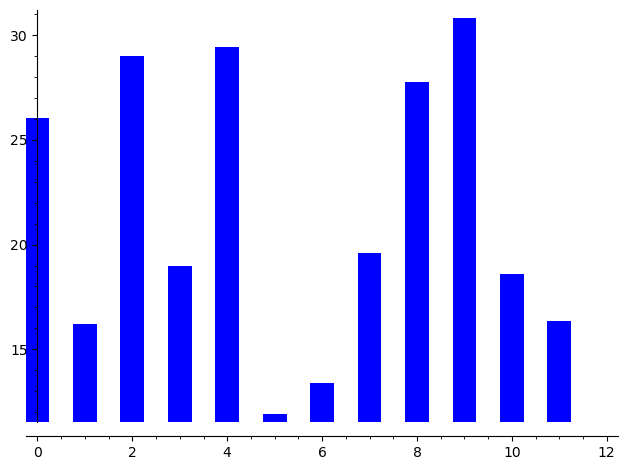

In [49]:
#Primero generamos la demanda 
num_periodos = 12
#definimos el costo de almacenamiento del producto
Ca = 20
#y el costo de variar la produccion
Cv = 50
generador_demanda = RealDistribution('uniform', [10, 35])
demanda = [generador_demanda.get_random_element() for _ in range(num_periodos)]
Barras = bar_chart(demanda)
Barras.show()

In [ ]:
# Queremos encontrar el plan de produccion que minimiza los costos

In [50]:
# Definimos un programa lineal
prog = MixedIntegerLinearProgram(maximization = False)
# Definimos las variables con el mismo nombre que en clase
x = prog.new_variable(name='produccion', nonnegative=True)
y = prog.new_variable(name='incremento', nonnegative=True)
z = prog.new_variable(name='decremento', nonnegative=True)
a = prog.new_variable(name='almacen', nonnegative=True)
# Declaramos la funcion objetivo
prog.set_objective( sum( [Cv*(y[i] + z[i]) + Ca*a[i] for i in range(1,num_periodos+1)] ))
# Declaramos las restricciones
for i in range(1,num_periodos+1):
    # el almacenamiento es igual a la prod + almacenamiento previo - demanda
    prog.add_constraint(a[i] == x[i] + a[i-1] - demanda[i-1])
    # la variacion en la prod es incremento - decremento
    prog.add_constraint(x[i] - x[i-1] == y[i] - z[i])
    # no se puede dejar demanda insatisfecha
    prog.add_constraint(x[i] + a[i-1] >= demanda[i-1])
prog.add_constraint(x[0] == 0)
prog.add_constraint(a[0] == 0)
prog.add_constraint(a[12] == 0)
#resolvemos el problema
prog.solve()

3128.083757008426

In [51]:
# Mostramos las variables (noten las variables que no son positivas al mismo tiempo)
X = list(prog.get_values(x).values())
Y = prog.get_values(y).values()
Z = prog.get_values(z).values()
A = list(prog.get_values(a).values())
print (' y        z')
for i,j in zip(Y,Z):
    print ('%3.3f   %3.3f'%(i,j))

 y        z
26.036   0.000
-0.000   2.630
-0.000   0.000
-0.000   0.000
-0.000   0.000
-0.000   2.717
-0.000   0.000
0.000   0.000
-0.000   0.000
-0.000   0.000
-0.000   2.070
-0.000   2.256


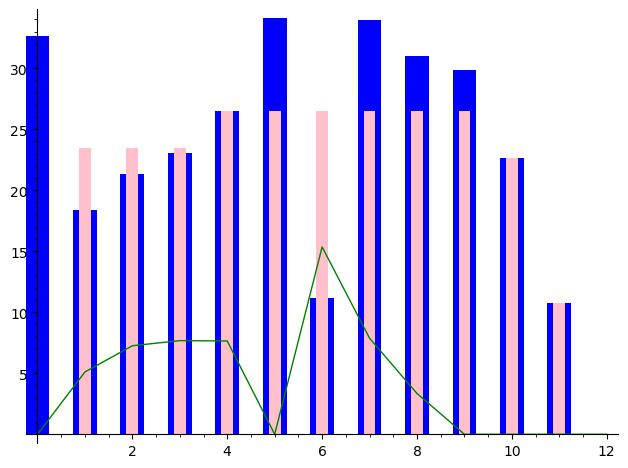

In [4]:
# Graficamos las produccion a la par de la demanda
Barras += bar_chart(X[1:], width = 0.25, color='pink')
Barras += list_plot(A,plotjoined=True,color='green')
# Azul: demanda, Rosado: produccion, Verde es el almacenamiento
Barras.show()

## Minimizing the sum of absolute values instead of the squares:
Tomado del Libro de Matousek
$$\min \sum |ax_i + b - y_i |$$
Introducimos las variables $e_i = |ax_i + b - y_i |$.

Using the model:
$$\min e_1+e_2+\ldots + e_n$$
 Subject to:
$$e_i \geq a\, x_i + b - y_i$$
 $$e_i \geq -(a\, x_i +b-y_i)$$

 Recordemos que para cualquier numero real $z$, tenemos que $|z| \geq z$ y $|z| \geq -z$.

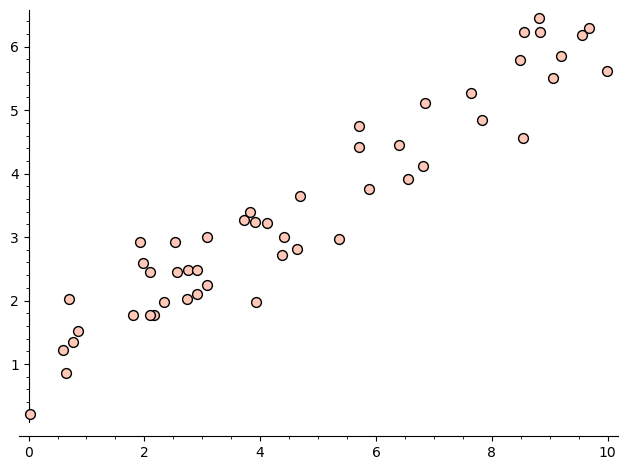

In [57]:
# Generamos datos para la recta de "regresion"
gen_x = RealDistribution('uniform', [0, 10])
gen_noise = RealDistribution('gaussian', 0.5)
x = [gen_x.get_random_element() for _ in range(50)]
noise = [gen_noise.get_random_element()  for _ in range(len(x))]
y = [1 + 0.5*x[i] + noise[i] for i in range(len(x))]

datos = list(zip(x, y))
scatter_plot(datos)

In [58]:
#FITTING THE DATA BY THE LEAST LINEAR DISTANCE
ajuste = MixedIntegerLinearProgram(maximization = False)
e = ajuste.new_variable(nonnegative=True)            # variables de error, hay una variable e_i por cada punto de datos
a = ajuste.new_variable(nonnegative=False)       # variables del modelo y = a*x + b  
b = ajuste.new_variable(nonnegative=False)
ajuste.set_objective(sum([e[i] for i in range(len(datos))]))
for j in range(len(datos)):
    #pass
    ajuste.add_constraint(e[j] >= -a[0]*x[j] + b[0] - y[j] )           ## Note que a y b siempre tienen indice.
    ajuste.add_constraint(e[j] >= y[j] + a[0]*x[j] - b[0] )
ajuste.solve()

19.947105385107637

In [59]:
# solo es preparacion para la grafica 
aa = ajuste.get_values(a)[0]
bb = ajuste.get_values(b)[0]
rectaAjuste = [(0,bb), (10, -aa*10 + bb)]

In [60]:
## LEAST SQUARE METHOD
A = matrix(len(datos), 2, zip(len(datos)*[1], x))
B = vector(y)
m = A.transpose()*A
(amin,bmin) = m.solve_right(A.transpose()*B);show([amin,bmin])
rectaMinCuadrados = [(0,amin), (10, bmin*10 + amin)]

[0.9250988127388985, 0.537327775388824]

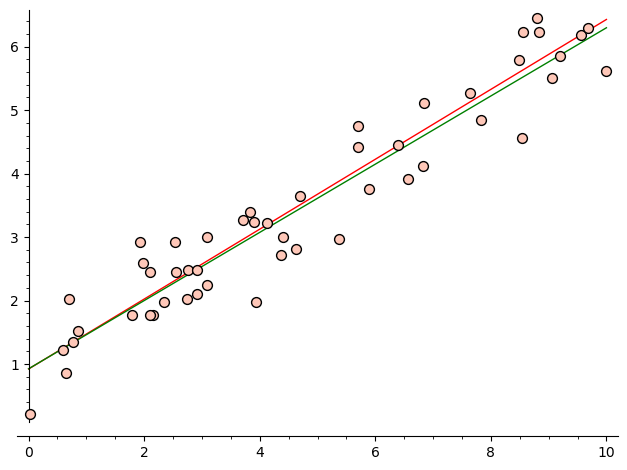

In [61]:
## GRAPH ALL THE DATA 
##    THE GREEN LINE IS THE DATA ADJUSTED BY THE LEAST SQUARE METHOD
##    THE RED LINE REPRESENTS THE MINIMUM DISTANCES TO THE ABSOLUTE VALUE METHOD
scatter_plot(datos) + line(rectaAjuste,color='red') + line(rectaMinCuadrados, color='green')

In [68]:
# HERE WE SEPARATE TWO SETS OF POINTS BY A  OF DEGREE n
grado = 2
verdes = [(2,1),(3,1),(4,2),(5,1),(7,1),(7,4)]   ## observe que la lista no es una funcion!!!
rojos  = [(2,3),(3,6),(4,5),(5,6),(6,1),(3,3)]
separa = MixedIntegerLinearProgram()
delta = separa.new_variable()
ap     = separa.new_variable()             ## SAGE supone todas las variables como no-negativas
an     = separa.new_variable()             ##  por eso tenemos que hacer el cambio de variable a = ap - an  
separa.set_objective(delta[0])             ##  no se como cambiar esto.
for i in range(len(rojos)):
    Lista = [ (ap[j]-an[j])*(rojos[i][0])^j for j in range(1,grado +1)]
    separa.add_constraint( ap[0]-an[0] + sum(Lista) + delta[0], max = rojos[i][1] )
for i in range(len(verdes)):
    Lista = [ (ap[j]-an[j])*verdes[i][0]^j for j in range(1,grado +1)]
    separa.add_constraint( ap[0]-an[0] + sum(Lista) - delta[0], min = verdes[i][1] )
separa.solve()

-0.7777777777777778

In [69]:
var('t')
curvaSep = sum( [ (separa.get_values(ap)[i]-separa.get_values(an)[i])*t^i for i in range(grado+1)] )
curvaSep

0.3888888888888888*t^2 - 3.61111111111111*t + 9.444444444444441

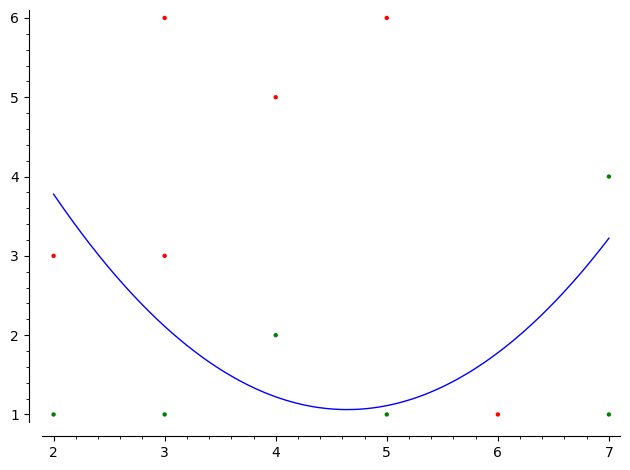

In [70]:
point(verdes,color='green') + point(rojos,color='red') + plot(curvaSep,2,7)

In [86]:
# GENERATE A RANDOM GRAPH 10 VERTICES AND 30 EDGES
g = graphs.RandomGNM(60,180)

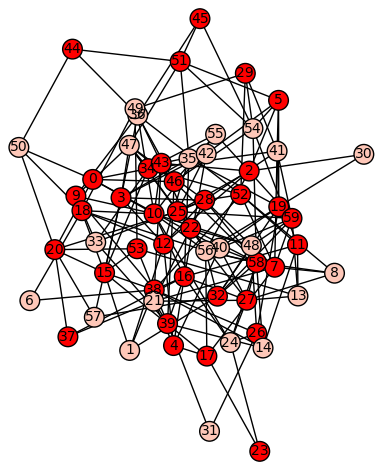

In [87]:
#FIND THE MINIMUM VERTEX COVER OF THE GRAPH
# El cubrimiento de un grafo es un seleccion de vertices que tocan todas las aristas
# El minimo cubrimiento es una con el minimo numero de vertices posible.
minvercov = MixedIntegerLinearProgram(maximization = False)
x = minvercov.new_variable(binary=True)
minvercov.set_objective(sum( [x[v] for v in g] ))
for (s,t,label) in g.edges():
    minvercov.add_constraint(x[s] + x[t], min=1)
minvercov.solve()
sol=minvercov.get_values(x)
g.plot(vertex_colors={'red':[k for k in sol if sol[k]>0]})

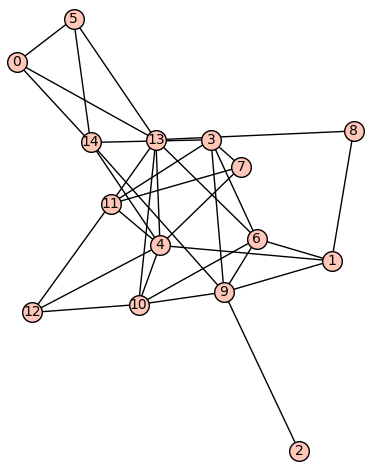

In [90]:
##DEFINIMOS LOS GRAFOS PARA HALLAR LA MAXIMA CAPACIDAD
#G = Graph('Ihe\\n@GUA')
G = graphs.RandomGNM(15,32)
H = DiGraph()
H.add_edges(G.edges())
G.plot().show()

La Cap. Max. es 7.0


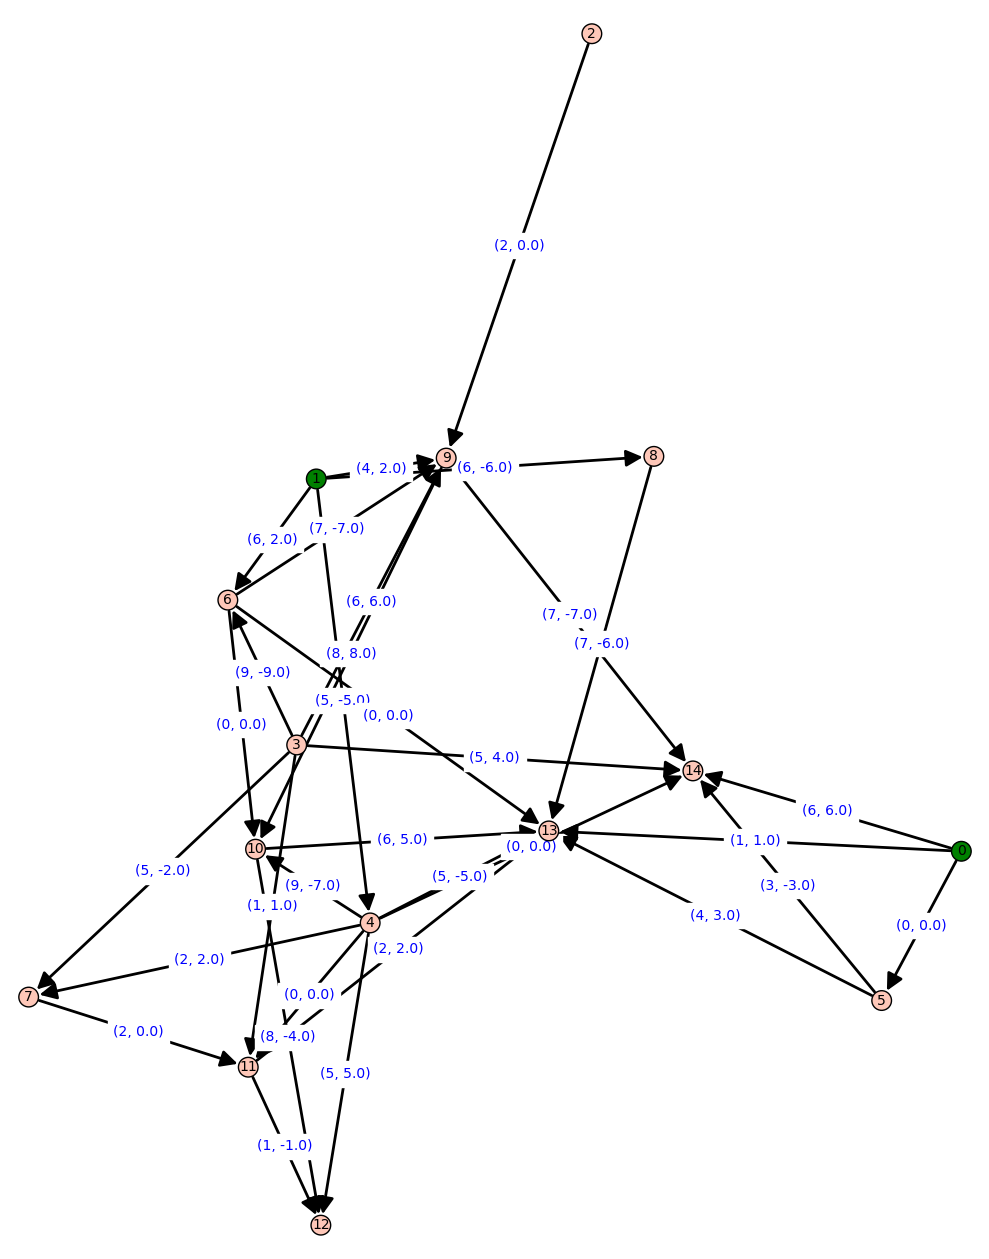

In [91]:
def donde_diam(G):
    '''
    ENCUENTRA UNA PAREJA DE VERTICES QUE ESTA
    A DISTANCIA IGUAL AL DIAMETRO DEL GRAFO
    '''
    diam = G.diameter()
    for i in G.vertices():
        for j in G.vertices():
            if G.distance(i,j) == diam:
                return [i,j]

#GENERAMOS LAS CAPACIDADES MAXIMAS DE LAS ARISTAS
for ar in H.edges():
    l = randint(0,9)
    H.set_edge_label(ar[0],ar[1],l)
    
#ENCONTRAMOS LA MAXIMA CAPACIDAD DE UN GRAFO 
maxcap = MixedIntegerLinearProgram(maximization = True)
#LA SOLUCION PUEDE SER NEGATIVA
x = maxcap.new_variable(nonnegative=False)
fuen,sumi = donde_diam(G)
maxcap.set_objective(sum( [x[(s,t)] for (s,t,label) in H.edges() if fuen in [s,t]] ))
#AGREGAMOS LAS RESTRICCIONES CORRESPONDIENTES A LAS CAPACIDADES
#MAXIMAS DE LAS ARISTAS
for (s,t,l) in H.edges():
    maxcap.add_constraint(x[(s,t)], max=l)
    maxcap.add_constraint(x[(s,t)], min=-l)
#LAS RESTRICCIONES CORRESPONDIENTES A LA CONSERVACION EN 
#LOS VERTICES
for v in [v for v in H.vertices() if v not in [fuen,sumi]]:
    adentro = H.incoming_edges(v)
    afuera = H.outgoing_edges(v)
    maxcap.add_constraint(sum([x[(s,t)] for (s,t,lab) in adentro]) == sum([x[(s,t)] for (s,t,lab) in afuera]))
     
Msol = maxcap.solve()
solu = maxcap.get_values(x)
for s,t,lab in H.edges():    
    l = solu[(s,t)]
    H.set_edge_label(s,t,(lab,l))

print("La Cap. Max. es %s"%Msol)

H.plot(edge_labels=True,vertex_labels=True,vertex_colors={'green':donde_diam(G)},figsize=[10,15])

In [33]:
## Encontramos el maximo circulo inscrito 
## GENERATE THE POINTS RANDOMLY
puntos = [(10*random(),10*random()) for i in range(20)]
## USAMOS LAS MARAVILLOSAS FUNCIONES DE SAGE
W = Polyhedron(vertices = puntos,base_ring=RDF)
desis = W.inequalities()
cir = MixedIntegerLinearProgram(maximization=True)
s = cir.new_variable()
r = cir.new_variable(nonnegative=True)
cir.set_objective(r[0])
## AQUI AGREGO LAS RESTRICCIONES
## PARA c DE CONSTRAINT
for c in desis:
    den = RR(sqrt(c[1]^2 + c[2]^2))
    cir.add_constraint(c[0]/den + c[1]/den*s[0] + c[2]/den*s[1] - r[0],min = 0)

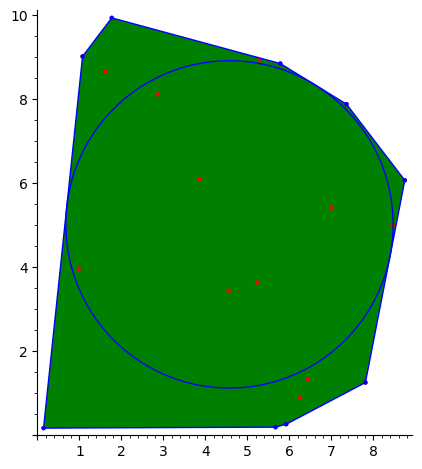

In [34]:
radio=cir.solve()
centro = cir.get_values(s)[0],cir.get_values(s)[1]
Pic =  point2d(puntos,color='red',zorder=1) + W.plot() + circle(centro,radio)
Pic.show(aspect_ratio=1)